# Teorema do Limite Central (*Central Limit Theorem*)

O TLC é um resultado muito importante da Estatística. Considere uma população com média $\mu$ e variância $\sigma^2$. O TLC declara que,
conforme consideramos tamanhos de amostra $n$ cada vez maiores:

1. A distribuição amostral da média amostral $\overline{x}$ (i.e., a distribuição das médias computadas para as amostras de um dado tamanho fixo $n$) aproxima-se cada vez mais de uma distribuição normal:
$$
\overline{x} \sim \mathcal{N}\left(\mu_{\overline{x}}, \sigma^2_{\overline{x}}\right)
$$

2. Essa distribuição amostral (aproximadamente normal) terá uma média próxima à media da população.
$$
\mu_{\overline{x}}= \operatorname{E}[\overline{x}] \approx \mu
$$
3. A variância da média amostral é próxima à variância da população dividida pelo tamanho das amostras.
$$
\sigma_{\overline{x}}^2 = Var[\overline{x}] \approx \frac{\sigma^2}{n}
$$

Alguns comentários sobre os itens do TLC:

- O item 1 afirma que a distribuição amostral das média se aproxima de uma curva normal. Isso é verdade, independentemente da forma da distribuição da população da qual as médias são obtidas, desde que o tamanho da amostra seja razoavelmente grande (mais de 30).

- O item 2 afirma que média de uma distribuição amostral das médias (a média das médias) é exatamente igual à verdadeira média da população, no caso teórico: $\mu_{\overline{x}} = \mu$. No caso empírico, se tomarmos um grande número de médias de amostras aleatórias da mesma população e computarmos a distribuição amostral empírica de $\overline{x}$, essa distribuição terá média próxima à média da população.

- Sobre o item 3, podemos também afirmar que desvio padrão de uma distribuição amostral de médias é menor do que o desvio padrão da população. Em particular $\sigma_{\overline{x}} = \sigma/\sqrt{n}$.

A figura a seguir ([fonte](https://medium.com/@birajparikh/what-is-central-limit-theorem-clt-db3679433dcb)) fornece uma visão intuitiva acerca do TLC e sua relação com a distribuição amostral de $\overline{x}$.

<img src="https://miro.medium.com/max/1400/1*tJoyMMcdILCO8PQJ6d5RRA.jpeg" width="500"/>

O TLC afirma que a distribuição de $\overline{x}$ aproxima-se de uma distribuição normal conforme $n$ tende a infinito, e que a rapidez dessa convergência depende da distribuição da população. Se a população possuir uma distribuição

* *bastante assimétrica*, será necessário um $n$ relativamente grande para obter uma boa aproximação.
* *aproximadamente simétrica*, a aproximação do TLC pode ser boa até para valores pequenos de $n$.

Evidências empíricas mostram que, para a maioria das populações, se o tamanho da amostra for maior do que 30, a aproximação do TLC é boa. De todo modo, é importante entender que o TLC vale para **qualquer quer seja a distribuição da população**, para $n$ suficientemente grande. Isso é esquematicamente ilustrado na figura a seguir ([fonte](https://www.whatissixsigma.net/central-limit-theorem/)).

![](http://www.whatissixsigma.net/wp-content/uploads/2014/05/Central-Limit-Theorem-Distribution-Diagram.png)



## Simulação para ilustrar o TLC

Podemos exemplificar o TLC com uma simulação que envolve o lançamento de um dado de 6 lados (exemplo adaptado de https://machinelearningmastery.com/a-gentle-introduction-to-the-central-limit-theorem-for-machine-learning/). Cada resultado tem uma probabilidade de 1 em 6. A distribuição dos números que aparecem em uma jogada de dados é uniforme, conforme ilustra o histograma na figura a seguir ([fonte](https://study.com/academy/lesson/uniform-distribution-in-statistics-definition-examples.html)). Essa é a **distribuição da população**.

![link text](https://study.com/cimages/multimages/16/uniform_distribution_die_v2.png)

É possível provar (veja [aqui](https://proofwiki.org/wiki/Expectation_of_Discrete_Uniform_Distribution) e [aqui](https://proofwiki.org/wiki/Variance_of_Discrete_Uniform_Distribution)) que, para uma variável aleatória discreta $X$ que segue uma distribuição uniforme e que pode assumir valores de $a=1$ até $b=6$, sua média é

$$
\mu = \operatorname{E}[X] = \frac{(a+b)}{2} = 3.5
$$

e sua variância é
$$
\sigma^2 = \operatorname{Var}[X] = \frac{(b-a+1)^{2}-1}{12} \approx 2.9166...
$$

Os valores de $\mu$ e de $\sigma^2$ acima são os parâmetros populacionais. Em uma situação real, esse valores raramente são conhecidos. Vamos, por meio de uma simulação computacional, verificar a veracidade das declarações do TLC.


O código a seguir usa a biblioteca [matplotlib](https://matplotlib.org) para gerar um gráfico da distribuição da população. O histograma gerado apresenta essencialmente a mesma informação do que a figura acima.

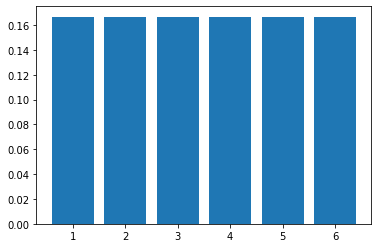

In [ ]:
import matplotlib.pyplot as plt

data = [1, 2, 3, 4, 5, 6]
freq = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

plt.bar(data, freq, align='center')
plt.gca().set_xticks(data)
plt.show()

No Python, há diversas formas alternativas para computar a média e a variância de uma população. Por exemplo, os valors obtidos pela aplicação das fórmulas acima podem também ser obtidos de forma programática usando as funções `np.mean` e `np.var`. Veja o bloco de código abaixo.

In [ ]:
import numpy as np
print(np.mean(data))
print(np.var(data))

3.5
2.9166666666666665



Podemos usar a função [randint](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html) do NumPy para simular um número específico de *observações*, i.e., de lançamentos do dado. Por exemplo, podemos gerar uma amostra de 50 observações, conforme ilustrado na célula de código abaixo.

In [ ]:
from numpy.random import randint

n = 50

# gera uma amostra de 50 lançamentos do dado
rolls = randint(1, 7, n)

print(rolls)

[2 6 1 3 2 1 4 1 2 1 5 1 5 3 1 6 2 5 5 1 3 5 6 4 5 2 1 6 2 3 2 1 6 4 6 3 6
 2 4 3 2 2 4 5 3 4 6 3 4 4]


Agora, em vez de apenas $50$, vamos gerar uma amostra de $10000$ observações. Em seguida, vamos construir a distribuição dessa amostra. O histograma gerado a seguir é a **distribuição da amostra**. Repare que, conforme esperado, a distribução da amostra é semelhante à distribuição da população.

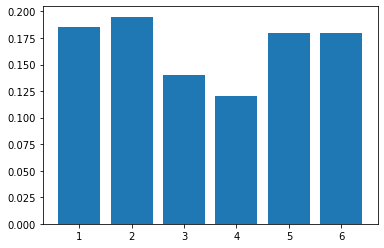

In [ ]:
from numpy.random import seed
from numpy.random import randint
from numpy import mean, std
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt

# seed the random number generator
seed(1)

sample = randint(1, 7, 100000)

labels, counts = np.unique(sample, return_counts=True)
plt.bar(labels, counts/10000, align='center')
plt.gca().set_xticks(labels)
plt.show()

Agora, para uma quantidade específica $n$ de lançamentos, podemos computar a média dos valores resultantes. O código a seguir exemplifica isso para $n=30$.

In [ ]:
from numpy.random import seed
from numpy.random import randint
from numpy import mean

rolls = randint(1, 7, 30)
print("Observações da amostra:\n", rolls)
print("Média das observações:\n", mean(rolls))

Observações da amostra:
 [3 1 6 1 3 4 4 6 2 5 1 5 4 1 6 4 6 4 1 3 3 3 4 2 2 5 2 2 5 3]
Média das observações:
 3.3666666666666667


O valor produzido acima é um dos valores que a estatística $\overline{x}$ pode assumir. De fato, podemos produzir múltiplos valores $\overline{x}$ e desenhar o histograma correspondente à **distribuição amostral empírica** de $\overline{x}$, conforme o código abaixo.

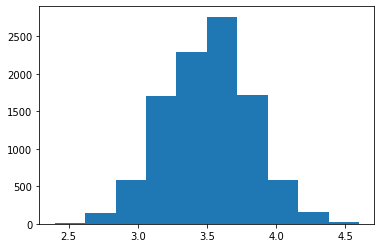

In [ ]:
from numpy.random import seed
from numpy.random import randint
from numpy import mean, std
import numpy as np
from matplotlib import pyplot

# seed the random number generator
seed(1)

n = 30
num_amostras = 10000

means = [mean(randint(1, 7, n)) for _ in range(num_amostras)]

pyplot.hist(means)
pyplot.show()

Para verificar numericamente se o resultado que obtemos está consistente com o TLC, podemos computar as aproximações para $\mu_\overline{x}$ e para $\sigma^2_\overline{x}$, conforme a seguir. Compare os valores produzidos abaixo com $\mu=3.5$ e com $\sigma^2 = 2.9166$. Você deve constatar que obtivemos aproximações bastante precisas para os parâmetros populacionais $\mu$ e $\sigma^2$.

In [ ]:
print(n)
print(mean(means))
print(np.var(means) * n)

50
3.50719
2.8948931949999994


$$
\sigma_{\overline{x}}^2 \approx \frac{\sigma^2}{n} \rightarrow \sigma^2 \approx n \times \sigma_{\overline{x}}^2
$$

Na simulação acima, usamos $n=50$. O TLC prediz que, se usarmos valores cada vez maiores de $n$, as aproximações computadas se tornam cada vez mais precisas. Para verificar isso, repita a simulação acima fazendo $n=500$, $n=5000$, etc.

## Outro exemplo para ilustrar o TLC

Créditos: o código a seguir foi retirado de https://towardsdatascience.com/central-limit-theorem-simulation-with-python-c80f8d3a6755

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plot

url = 'https://eic.cefet-rj.br/~ebezerra/wp-content/uploads/2020/02/CoffeeAndCodeLT2018.csv.txt'
df = pd.read_csv(url)
def look_at_data(dataset):
    print(dataset.head(10))
    print(dataset.info())
    print(dataset.shape)
    print(dataset.describe())
look_at_data(df)

   CodingHours  CoffeeCupsPerDay     CoffeeTime  ...  Gender  Country  AgeRange
0            8                 2  Before coding  ...  Female  Lebanon  18 to 29
1            3                 2  Before coding  ...  Female  Lebanon  30 to 39
2            5                 3   While coding  ...  Female  Lebanon  18 to 29
3            8                 2  Before coding  ...    Male  Lebanon       NaN
4           10                 3   While coding  ...    Male  Lebanon  18 to 29
5            8                 2   While coding  ...    Male  Lebanon  30 to 39
6            5                 2   While coding  ...    Male  Lebanon       NaN
7           10                 4  Before coding  ...    Male  Lebanon  18 to 29
8           10                 2   While coding  ...    Male  Lebanon  30 to 39
9           10                 2   While coding  ...    Male  Lebanon  30 to 39

[10 rows x 9 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 colu

Vamos considerar como nossa população os valores de quantidades de doses de café consumidas. Esses valores estão na coluna `CoffeeCupsPerDay` do conjunto de dados. A distribiução da população é apresentada abaixo. Repare que a média da população considerada é $\mu = 2.89$.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


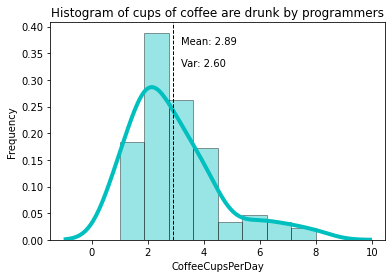

In [ ]:
fig, ax = plot.subplots()
fig = sns.distplot(df['CoffeeCupsPerDay'], hist=True, kde=True,
             bins=8, color = 'c',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_xlabel('CoffeeCupsPerDay')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of cups of coffee are drunk by programmers')
plot.axvline(df['CoffeeCupsPerDay'].mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plot.ylim()
plot.text(df['CoffeeCupsPerDay'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(df['CoffeeCupsPerDay'].mean()))
plot.text(df['CoffeeCupsPerDay'].mean()*1.1, max_ylim*0.8, 'Var: {:.2f}'.format(df['CoffeeCupsPerDay'].var()))
plot.show()

Agora, vamos produzir distribuições amostrais para diferentes tamanhos de amostra

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


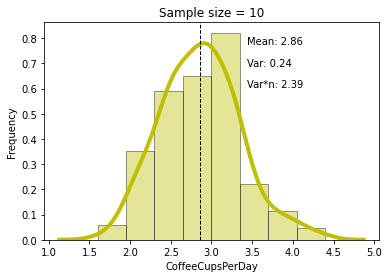

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


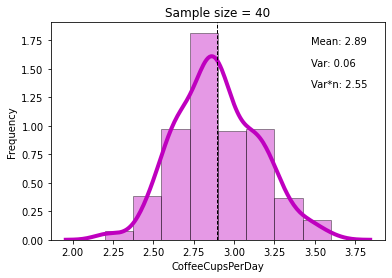

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


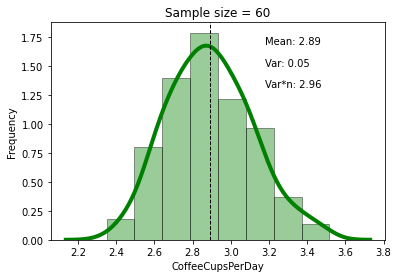

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


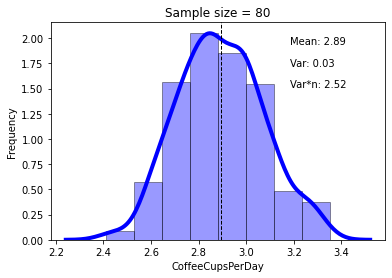

In [ ]:
array1 = []
array2 = []
array3 = []
array4 = []
num_amostras = 300
for i in range(1,num_amostras):
    array1.append(df['CoffeeCupsPerDay'].sample(n=10, replace= True).mean())
    array2.append(df['CoffeeCupsPerDay'].sample(n=40, replace=True).mean())
    array3.append(df['CoffeeCupsPerDay'].sample(n=60, replace=True).mean())
    array4.append(df['CoffeeCupsPerDay'].sample(n=80, replace=True).mean())

fig, ax = plot.subplots()
fig = sns.distplot(array1, hist=True, kde=True,
             bins=8, color = 'y',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_xlabel('CoffeeCupsPerDay')
ax.set_ylabel('Frequency')
ax.set_title('Sample size = 10')
plot.axvline(np.mean(array1), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plot.ylim()
plot.text(np.mean(array1)*1.2, max_ylim*0.9, 'Mean: {:.2f}'.format(np.mean(array1)))
plot.text(np.mean(array1)*1.2, max_ylim*0.8, 'Var: {:.2f}'.format(np.var(array1)))
plot.text(np.mean(array1)*1.2, max_ylim*0.7, 'Var*n: {:.2f}'.format(np.var(array1)*10))
plot.show()

fig, ax = plot.subplots()
fig = sns.distplot(array2, hist=True, kde=True,
             bins=8, color = 'm',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_xlabel('CoffeeCupsPerDay')
ax.set_ylabel('Frequency')
ax.set_title('Sample size = 40')
plot.axvline(np.mean(array2), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plot.ylim()
plot.text(np.mean(array2)*1.2, max_ylim*0.9, 'Mean: {:.2f}'.format(np.mean(array2)))
plot.text(np.mean(array2)*1.2, max_ylim*0.8, 'Var: {:.2f}'.format(np.var(array2)))
plot.text(np.mean(array2)*1.2, max_ylim*0.7, 'Var*n: {:.2f}'.format(np.var(array2)*40))
plot.show()

fig, ax = plot.subplots()
fig = sns.distplot(array3, hist=True, kde=True,
             bins=8, color = 'g',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_xlabel('CoffeeCupsPerDay')
ax.set_ylabel('Frequency')
ax.set_title('Sample size = 60')
plot.axvline(np.mean(array3), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plot.ylim()
plot.text(np.mean(array3)*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(np.mean(array3)))
plot.text(np.mean(array3)*1.1, max_ylim*0.8, 'Var: {:.2f}'.format(np.var(array3)))
plot.text(np.mean(array3)*1.1, max_ylim*0.7, 'Var*n: {:.2f}'.format(np.var(array3)*60))
plot.show()

fig, ax = plot.subplots()
fig = sns.distplot(array4, hist=True, kde=True,
             bins=8, color = 'b',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_xlabel('CoffeeCupsPerDay')
ax.set_ylabel('Frequency')
ax.set_title('Sample size = 80')
plot.axvline(np.mean(array4), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plot.ylim()
plot.text(np.mean(array4)*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(np.mean(array4)))
plot.text(np.mean(array4)*1.1, max_ylim*0.8, 'Var: {:.2f}'.format(np.var(array4)))
plot.text(np.mean(array4)*1.1, max_ylim*0.7, 'Var*n: {:.2f}'.format(np.var(array4)*80))
plot.show()

Nos gráficos gerados acima, note que, conforme consideramos tamanhos de amostra cada vez maiores,
1. a forma da distribuição amostral resultante se aproxima cada vez mais da distribuição normal;
2. a média da distribuição amostral se aproxima cada vez mais do valor da média populacional $\mu$;
3. a variância da distribuição amostral se aproxima cada vez mais do valor $\sigma^2/n$;

# Lei dos Grandes Números

A chamada Lei dos Grandes Números (*Law of Large Numbers*, LLN) é outra afirmação sobre a estatística denominada média amostral, ${\overline{x}}$. A LLN declara o seguinte:

> O valor esperado da **média empírica** (*empirical mean* ou *sample mean*) converge para o valor esperado da população (i.e., para a **média populacional**) conforme consideramos mais e mais realizações de um experimento aleatório.

De maneira mais formal, a LLN por ser declarada como segue. considere uma população cuja distribuição tem média $\mu$. Considere que $\varepsilon$ é um número não-negativo tão pequeno quanto se queira. Então:

$$
\lim_{n \rightarrow \infty} \Pr(\left|{\overline{x}}_n-\mu \right|<\varepsilon ) = 1
$$

A expressão acima nos informa que $\overline{x}_n$ converge para $\mu$ conforme $n$ (o tamanho das amostras consideradas para gerar valores de $\overline{x}_n$) cresce.

## Exemplo lançamento de um dado

Para ilustrar a LLN, considere o experimento aleatório correspondente ao jogar de um dado não-viciado. Vamos denotar por $X$ a variável aleatória associada ao resultado desse experimento. Então $X \in \{1,2,3,4,5,6\}$.

Em geral, o valor esperado de uma v.a. discreta pode ser computado pela expressão abaixo:

$$
\mu_X = \operatorname{E}[X] = \sum_{x} x \times \Pr(X=x)
$$

O valor esperado de $X$ é computado da seguinte forma:

$$
\operatorname{E}[X] = \sum_{x \in X} x \times \Pr(X=x)= 1 \times \frac{1}{6}+2 \times \frac{1}{6}+3 \times \frac{1}{6}+4 \times \frac{1}{6}+5 \times \frac{1}{6}+6 \times \frac{1}{6}=3.5
$$

De acordo com a LLN, se o dado for lançado um grande número de vezes, a média de seus valores (i.e., a média amostral) provavelmente será próxima a 3.5, com a precisão aumentando à medida que aumenta a quantidade de lançamentos para calcular a média.

A figura a seguir ([fonte](https://en.wikipedia.org/wiki/Law_of_large_numbers)) ilustra a declaração contida na LLN no contexto do experimento aleatório citado acima. O eixo horizontal representa a quantidade de lançamentos do dado (i.e., o tamanho da amostra). O eixo vertical corresponde ao valor da média amostral. Dessa forma, a linha azul corresponde a $\operatorname{E}[X] = 3.5$.
Cada ponto componente da curva em cor verde corresponde à média amostral computada para diferentes quantidades de lançamentos. Repare que a média amostral se aproxima cada vez mais da média teórica ($\operatorname{E}[X]$) conforme um grande número de realizações da variável aleatória é utilizado. De fato, se compararmos as metades à esquerda e à direita desse gráfico, podemos perceber um comportamento bem mais estável na segunda metade (que corresponde a tamanhos maiores de amostras).

![texto do link](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c9/Lawoflargenumbers.svg/1280px-Lawoflargenumbers.svg.png)

Outra declaração alternativa da LLN é a seguinte:

> A média amostral de $n$ variáveis aleatórias i.i.d. converge para a média populacional conforme $n$ cresce.

## (Esboço de) demonstração

A LLN segue da [desigualdade de Chebyshev’s](https://en.wikipedia.org/wiki/Chebyshev%27s_inequality), apresentada a seguir:

$$
\Pr(|X - \mu| \geq \varepsilon) \leq \frac{\sigma^2}{\varepsilon^2}
$$

Na expressão acima, $X$ é uma variável aleatória qualquer com valor esperado $\mu$ e variância finita $\sigma^2$, e $\varepsilon \in \mathbb{R}$, $\varepsilon > 0$.
A desigualdade de Chebyshev estabelece um limite superior sobre a probabilidade de $X$ assumir valores cuja diferença para seu valor esperado seja maior do que $\varepsilon$:

A LLN pode ser demonstrada pela aplicação da  desigualdade de Chebyshev’s sobre a variável aleatória $\overline{x}$, a média amostral para amostras de tamanho $n$.

$$
{\overline{x}}={\tfrac {1}{n}}(x_{1}+\cdots +x_{n}).
$$

A desigualdade de Chebyshev aplicada à variável $\overline{x}$ resulta no seguinte:

$$
\Pr(\left|{\overline{x}}-\mu_{\overline{x}} \right|\geq \varepsilon ) \leq {\frac {\sigma^{2}_{\overline{x}}}{\varepsilon ^{2}}}.
$$

Pelo TLC, $\overline{x}$ segue uma distribuição normal com média $\mu_\overline{x} = \mu$ e variância $\sigma^2_\overline{x} = \sigma^2/n$. Então:

$$
\Pr(\left|{\overline{x}}-\mu \right|\geq \varepsilon ) \leq {\frac {\sigma ^{2}}{n\varepsilon ^{2}}}.
$$

Para continuar a demonstração, lembre-se de que a soma das probabilidades de dois eventos mutuamente exclusivos e complementares é igual a $1$. Sendo assim:

$$
\Pr(\left|{\overline{x}}-\mu \right|\geq \varepsilon) + \Pr(\left|{\overline {x}}-\mu \right| < \varepsilon ) = 1
$$

A expressão acima pode ser facilmente reescrita como a seguinte:

$$
\Pr(\left|{\overline{x}}-\mu \right|<\varepsilon )=1-\Pr(\left|{\overline{x}}-\mu \right|\geq \varepsilon)
$$

Agora,
$$
\Pr(\left|{\overline{x}}-\mu \right|<\varepsilon ) \geq 1-{\frac {\sigma ^{2}}{n\varepsilon^{2}}}.
$$

Nessa última desigualdade, repare que, conforme $n \rightarrow \infty$, a expressão $\sigma ^{2}/n\varepsilon ^{2}$ tende a zero. Por outro lado, o valor máximo de probabilidade é $1$. Sendo assim, podemos concluir que

$$
\lim_{n \rightarrow \infty} \Pr(\left|{\overline{x}}-\mu \right|<\varepsilon ) = 1
$$

Essa última expressão nos informa que, de fato, a média amostral
$\overline{x}$ converge para a média populacional
$\mu$ conforme o tamanho das amostras consideradas cresce.

## Simulação para ilustrar a LLN

Créditos: exemplo adaptado desse [link](http://medium.com/analytics-vidhya/illustration-with-python-weak-law-of-large-numbers-2a644b862985).

O próximo exemplo ilustra a LLN no contexto da [distribuição Gamma](https://en.wikipedia.org/wiki/Gamma_distribution). Essa é outra distribuição teórica, com dois parâmetros, $k$ e $\theta$. Tanto $k$ quanto $\theta$ são números reais positivos. É possível provar que o valor esperado de uma variável $X$ que segue tal distribuição é dado pela expressão abaixo:

$$
E[X] = k\theta
$$

Na simulação abaixo, são usados os valores $k = 2.0$ e $\theta = 2.0$. Consequentemente, $E[X] = k\theta = 4.0$. ALLN afirma que esse é o valor para o qual a média empírica converge, conforme utilizamos tamanhos de amostras cada vez maiores.

Para confirmar a afirmação acima, no código abaixo, são geradas várias amostras a partir da mesma distribuição Gamma com os parâmetros fornecidos acima. São geradas amostras de 17 tamanhos distintos: $100, 600, \ldots, 8100$. Para cada um desses tamanhos, são geradas $50$ amostras e computadas as médias de cada uma delas. Isso permite gerar um *box plot* para cada um dos 17 tamanhos. Repare que, conforme o tamanho da amostra considerado aumenta, a amplitude do box plot correspondente diminui.

sample with 100 sample size,mean:4.011153915201283, standard deviation: 0.27979760733000875
sample with 8100 sample size,mean:3.9991893983900386, standard deviation: 0.027531349963428955


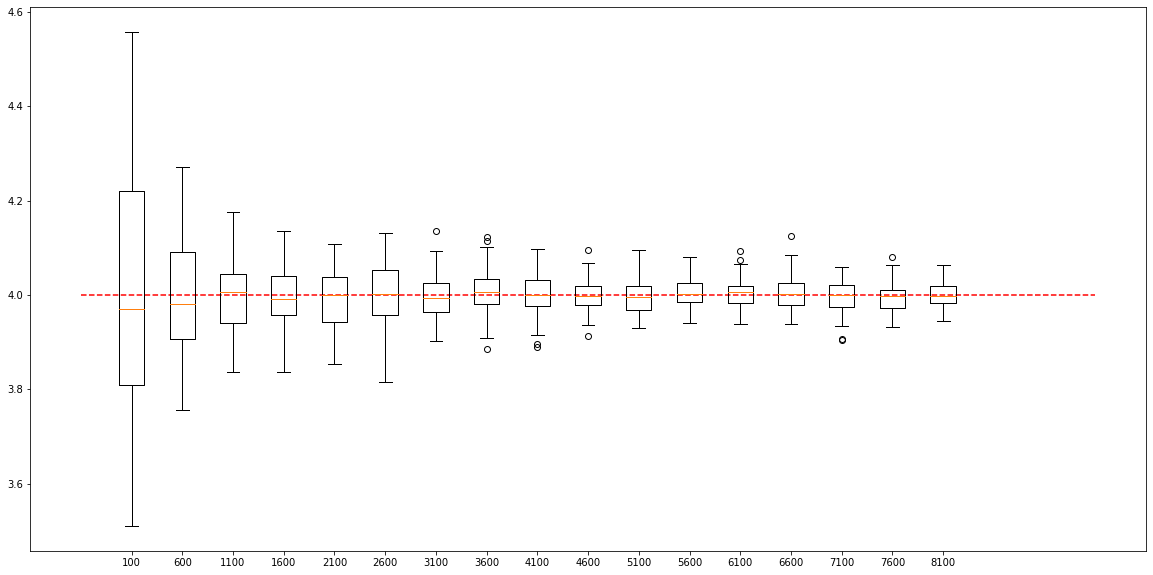

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

## weak law of large number
# Step 1
# create population with a gamma distribution
shape, scale = 2., 2.  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 1000000)

# Step 2
samplemeanlist = [] # list of sample mean
l = [] # list of smaple size, for x-axis of box plots
numberofsample = 50 # number of sample in each sample size

# set sample size (i) between 100 to 8100, step by 500
for i in range(100,8101,500):
    # set x-axis
    l.append(i)
    # list of mean of each sample
    ml = []
    # sample 50 time.
    for n in range(0,numberofsample):
        # random pick from population with sample size = i
        rs = random.choices(s, k=i)
        # calculate the mean of each sample and save it in list of mean
        ml.append(sum(rs)/i)

    # save the 50 sample mean in samplemeanlist for box plots
    samplemeanlist.append(ml)

# Step 3
# set figure size
boxplots = plt.figure(figsize=(20,10))
# plot box plots of each sample mean
plt.boxplot(samplemeanlist,labels = l)
# show plot.
boxplots.show()

print("sample with 100 sample size," + \
      "mean:" + str(np.mean(samplemeanlist[0])) + \
      ", standard deviation: "+ str(np.std(samplemeanlist[0])))
print("sample with 8100 sample size," + \
      "mean:" + str(np.mean(samplemeanlist[16])) + \
      ", standard deviation: "+ str(np.std(samplemeanlist[16])))

Repare também como as médias para cada tamanho de amostra convergem para a média teórica, cujo valor é $4.0$. Isso fica mais aparente no gráfico apresentado abaixo, que apresenta a média teórica como uma linha vermelha e tracejada.

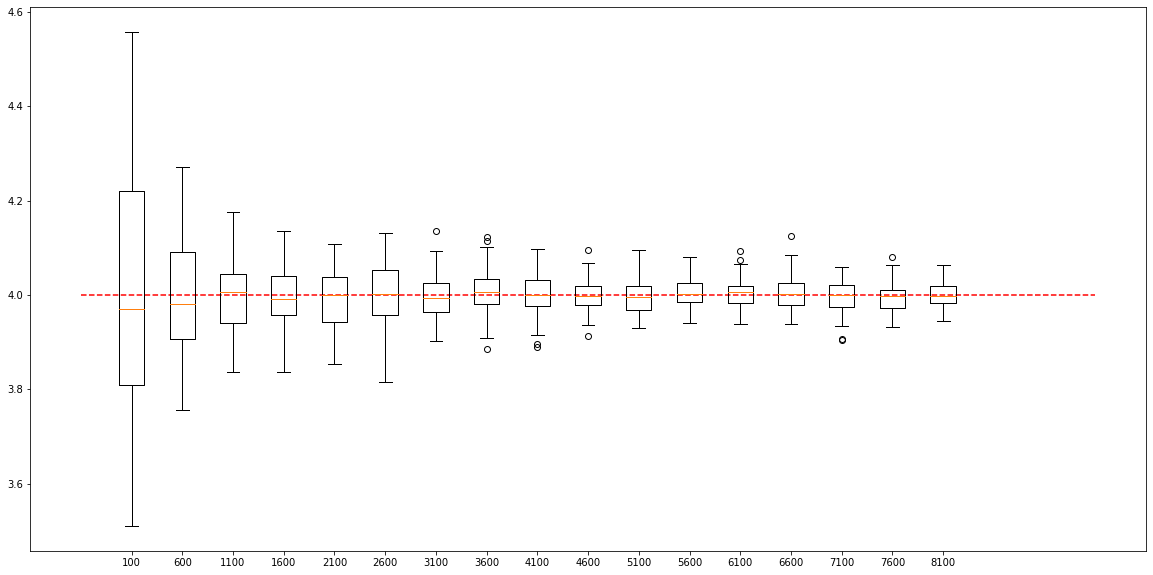

In [ ]:
boxplots = plt.figure(figsize=(20,10))
# plot box plots of each sample mean
plt.boxplot(samplemeanlist,labels = l)
# show plot.
boxplots.show()

plt.hlines(y=4.0, xmin=0, xmax=20, linestyles = 'dashed', colors = 'red')

Outro gráfico que confirma a LLN é o apresentado abaixo, no qual são desenhados dois histogramas, um para as amostras de tamanho $100$ e outro para as amostras de tamanho $8100$.

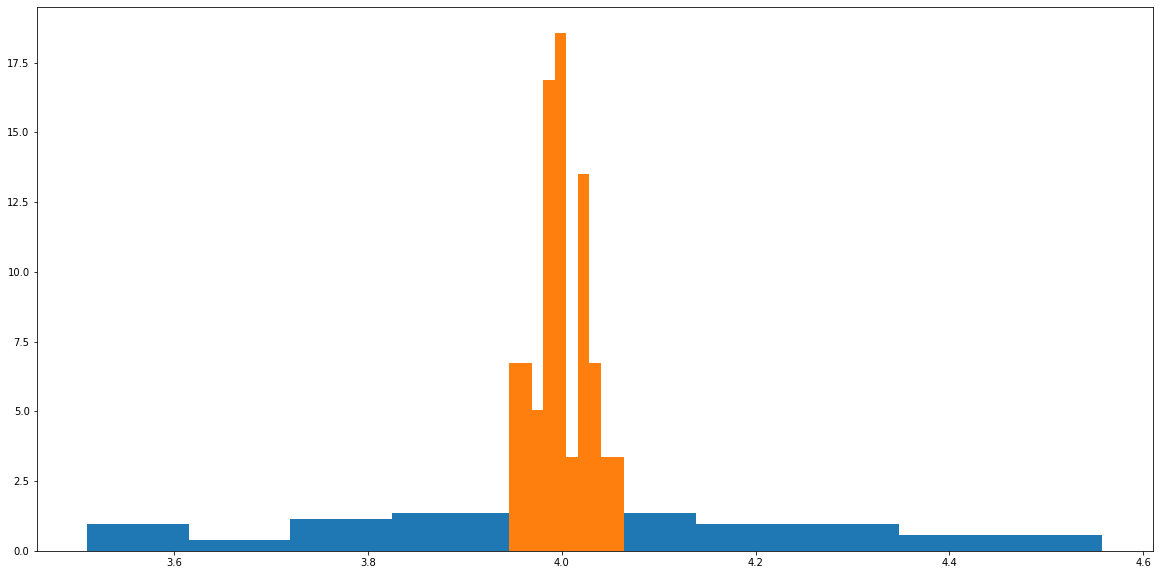

In [ ]:
histplot = plt.figure(figsize=(20,10))
plt.hist(samplemeanlist[0], 10, density=True)
plt.hist(samplemeanlist[16], 10, density=True)
histplot.show()